In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from langdetect import detect
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import csv
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ajay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ajay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [1]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import csv

firefox_options = Options()
firefox_options.add_argument('-headless')
firefox_binary_path = r"C:\Program Files\Mozilla Firefox\firefox.exe"
firefox_options.binary_location = firefox_binary_path
service = Service(executable_path=r"C:\Users\Ajay\Downloads\geckodriver-v0.33.0-win32\geckodriver.exe")
driver = webdriver.Firefox(service=service, options=firefox_options)

ratings_to_collect = 1000    

data = []  
url = "https://app.thestorygraph.com/book_reviews/4d0ec247-c054-4e6e-ad15-459003b999c3"
try:
    driver.get(url)
    collected_ratings = 0  # Reset collected_ratings for each URL
    collected_reviews = set()  # Keep track of collected reviews
    while collected_ratings < ratings_to_collect:
        try:
            ratings = WebDriverWait(driver, 20).until(
                EC.presence_of_all_elements_located((By.XPATH, '//p[@class="mb-2"]'))
            )
            reviews = driver.find_elements(By.XPATH, '//div[contains(@class, "review-explanation")]')
            for rating, review in zip(ratings, reviews):
                review_text = review.text
                if review_text not in collected_reviews:
                    url_rating_review = (url, rating.text, review_text)
                    data.append(url_rating_review)
                    collected_reviews.add(review_text)
                    collected_ratings += 1
                    print(rating.text)
                    print(review_text)
                    if collected_ratings >= ratings_to_collect or len(reviews) < len(ratings):
                        break
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        except Exception as e:
            print(f"Error while scraping {url}: {e}")
            break

except Exception as e:
    print(f"Error: {e}")

finally:
    driver.quit()

AngelsAndDemons_Book = pd.DataFrame(data, columns=["bURL", "bRating", "bReview"])


5.0
I've watched the movie recently so I've decided to re-read this book and I am surprised by how much I see it now compared to how I felt when I read it 2 years ago.
This book raised controversial issues regarding the foundations of Christianity and frankly, it was too much to unpack.
Still, I've enjoyed it the like the first time.
4.0
Δεν ξέρω γιατί μέχρι τώρα δεν είχα διαβάσει Dan Brown, δεν έτυχε; Δεν το σκέφτηκα γιατί διάβαζα άλλα; Δεν ξέρω. Ευτυχώς τα κέρδισα απο έναν διαγωνισμό στο ραδιόφωνο και ξεκίνησα ήδη αυτό το υπέροχο ταξίδι. Είχα πολύ καιρό να μείνω ξύπνια γιατί ήθελα να μάθω την συνέχεια. Αν έχεις ελεύθερο χρόνο, άνετα το διαβάσεις μεσα σε δυο μέρες. Απλά υπέροχο, τόσο περιγραφικός όσο πρέπει, για να βλέπεις και εσύ με τα μάτια του πρωταγωνιστή που είναι και τι βλέπει. Βλέπεις μπροστά σου και ζεις μέσα στην αιώνια πόλη και το Βατικανό, ανατροπές, ένταση, αγωνία. Αν αγαπάς τα βιβλία περιπέτειας, τότε δεν πρέπει να λείπει απο την βιβλιοθήκη σου! Ενα βιβλίο γεμάτο ιστορικά

In [2]:
AngelsAndDemons_Book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   bURL     1000 non-null   object
 1   bRating  1000 non-null   object
 2   bReview  1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [3]:
#Checking null values

missing_counts = AngelsAndDemons_Book.isnull().sum()
print(missing_counts)

bURL       0
bRating    0
bReview    0
dtype: int64


In [4]:
#since no null values I'll convert the ratings column to float
AngelsAndDemons_Book['bRating'] = AngelsAndDemons_Book['bRating'].astype('float') 
AngelsAndDemons_Book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bURL     1000 non-null   object 
 1   bRating  1000 non-null   float64
 2   bReview  1000 non-null   object 
dtypes: float64(1), object(2)
memory usage: 23.6+ KB


In [5]:
AngelsAndDemons_Book['bRating'].mean()

3.8605

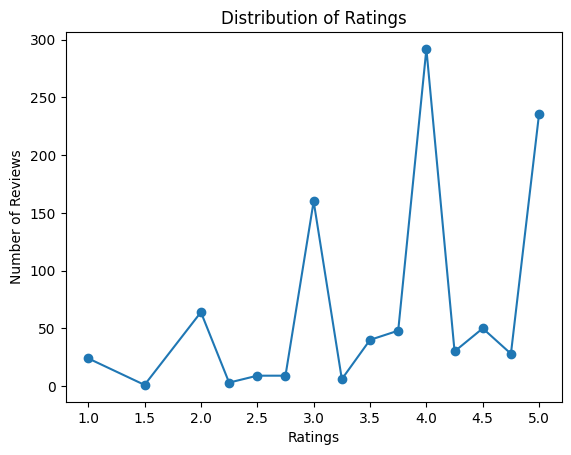

In [8]:
AngelsAndDemons_Counts = AngelsAndDemons_Book['bRating'].value_counts().sort_index()
plt.plot(AngelsAndDemons_Counts.index, AngelsAndDemons_Counts.values, marker='o')

plt.xlabel('Ratings')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Ratings')

plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ajay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ajay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    cleaned_text = ' '.join(tokens)
    return cleaned_text
AngelsAndDemons_Book['PreprocessedReviews'] = AngelsAndDemons_Book['bReview'].apply(preprocess_text)
print(AngelsAndDemons_Book)


                                                  bURL  bRating  \
0    https://app.thestorygraph.com/book_reviews/4d0...      5.0   
1    https://app.thestorygraph.com/book_reviews/4d0...      4.0   
2    https://app.thestorygraph.com/book_reviews/4d0...      5.0   
3    https://app.thestorygraph.com/book_reviews/4d0...      5.0   
4    https://app.thestorygraph.com/book_reviews/4d0...      3.0   
..                                                 ...      ...   
995  https://app.thestorygraph.com/book_reviews/4d0...      3.5   
996  https://app.thestorygraph.com/book_reviews/4d0...      5.0   
997  https://app.thestorygraph.com/book_reviews/4d0...      4.0   
998  https://app.thestorygraph.com/book_reviews/4d0...      5.0   
999  https://app.thestorygraph.com/book_reviews/4d0...      2.0   

                                               bReview  \
0    I've watched the movie recently so I've decide...   
1    Δεν ξέρω γιατί μέχρι τώρα δεν είχα διαβάσει Da...   
2               I am 

In [12]:
nltk.download('punkt')
stemmer = PorterStemmer()
def stem_text(text):
    words = nltk.word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text
AngelsAndDemons_Book['StemmedReviews'] = AngelsAndDemons_Book['PreprocessedReviews'].apply(stem_text)
print(AngelsAndDemons_Book[['PreprocessedReviews', 'StemmedReviews']])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ajay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                   PreprocessedReviews  \
0    watched movie recently decided book surprised ...   
1    δεν ξέρω γιατί μέχρι τώρα δεν είχα διαβάσει da...   
2                            still shocked review come   
3    angels demons thought decent read enjoyed char...   
4                                 really smart written   
..                                                 ...   
995                         found better da vinci code   
996  fast paced book easy read highly entertaining ...   
997  dan brown hack albeit successful hack thought ...   
998  absolutely loved book point could barely put l...   
999  archivist symbologist robert langdon receives ...   

                                        StemmedReviews  
0    watch movi recent decid book surpris much see ...  
1    δεν ξέρω γιατί μέχρι τώρα δεν είχα διαβάσει da...  
2                              still shock review come  
3    angel demon thought decent read enjoy charact ...  
4                 

In [13]:

def detect_language(text):
    try:
        lang = detect(text)
        return lang == 'en'
    except:
        return False

AngelsAndDemons_Book['IsEnglish'] = AngelsAndDemons_Book['PreprocessedReviews'].apply(detect_language)
AngelsAndDemons_Book = AngelsAndDemons_Book[AngelsAndDemons_Book['IsEnglish']]


In [14]:
AngelsAndDemons_Book

bURL  bRating  \
0    https://app.thestorygraph.com/book_reviews/4d0...      5.0   
2    https://app.thestorygraph.com/book_reviews/4d0...      5.0   
3    https://app.thestorygraph.com/book_reviews/4d0...      5.0   
4    https://app.thestorygraph.com/book_reviews/4d0...      3.0   
6    https://app.thestorygraph.com/book_reviews/4d0...      4.0   
..                                                 ...      ...   
991  https://app.thestorygraph.com/book_reviews/4d0...      4.5   
996  https://app.thestorygraph.com/book_reviews/4d0...      5.0   
997  https://app.thestorygraph.com/book_reviews/4d0...      4.0   
998  https://app.thestorygraph.com/book_reviews/4d0...      5.0   
999  https://app.thestorygraph.com/book_reviews/4d0...      2.0   

                                               bReview  \
0    I've watched the movie recently so I've decide...   
2               I am still shocked. Review to come! :)   
3    Angels & Demons -\n\nI thought this was a dece...   
4                                Really smart written.   
6    4.75 stars\nSo, this is a re-read for me BUT I...   
..                                                 ...   
991  This book was lack luster. I'm here for action...   
996  Fast paced book, very easy read and highly ent...   
997  Dan Brown is a hack, albeit a very successful ...   
998  I absolutely loved this book. To the point I c...   
999  when archivist and symbologist robert langdon ...   

                                   PreprocessedReviews  \
0    watched movie recently decided book surprised ...   
2                            still shocked review come   
3    angels demons thought decent read enjoyed char...   
4                                 really smart written   
6    stars remember anything previous read things m...   
..                                                 ...   
991  book lack luster action adventure conspiracies...   
996  fast paced book easy read highly entertaining ...   
997  dan brown hack albeit successful hack thought ...   
998  absolutely loved book point could barely put l...   
999  archivist symbologist robert langdon receives ...   

                                        StemmedReviews  IsEnglish  
0    watch movi recent decid book surpris much see ...       True  
2                              still shock review come       True  
3    angel demon thought decent read enjoy charact ...       True  
4                                 realli smart written       True  
6    star rememb anyth previou read thing may consi...       True  
..                                                 ...        ...  
991  book lack luster action adventur conspiraci ch...       True  
996  fast pace book easi read highli entertain enou...       True  
997  dan brown hack albeit success hack thought med...       True  
998  absolut love book point could bare put love ev...       True  
999  archivist symbologist robert langdon receiv ph...       True  

[785 rows x 6 columns]

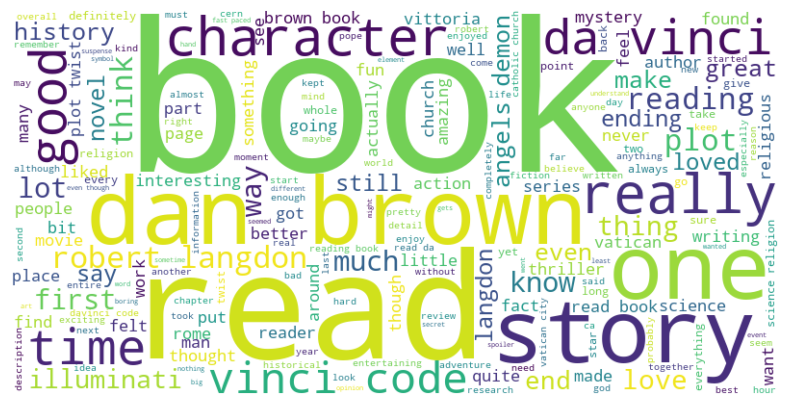

In [15]:


and_book_reviews = ' '.join(AngelsAndDemons_Book['PreprocessedReviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(and_book_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [123]:


analyzer = SentimentIntensityAnalyzer()

for index, row in AngelsAndDemons_Book.iterrows():
    review_text = row['PreprocessedReviews']
    sentiment_scores = analyzer.polarity_scores(review_text)
    
    if sentiment_scores['compound'] >= 0.05:
        vasentiment = 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        vasentiment = 'Negative'
    else:
        vasentiment = 'Neutral'
    
    AngelsAndDemons_Book.at[index, 'VASentiment'] = vasentiment

print(AngelsAndDemons_Book[['bRating','PreprocessedReviews', 'VASentiment']])


     bRating                                PreprocessedReviews VASentiment
0        5.0  watched movie recently decided book surprised ...    Positive
2        5.0                          still shocked review come    Negative
3        5.0  angels demons thought decent read enjoyed char...    Positive
4        3.0                               really smart written    Positive
6        4.0  stars remember anything previous read things m...    Positive
..       ...                                                ...         ...
991      4.5  book lack luster action adventure conspiracies...    Positive
996      5.0  fast paced book easy read highly entertaining ...    Positive
997      4.0  dan brown hack albeit successful hack thought ...    Positive
998      5.0  absolutely loved book point could barely put l...    Positive
999      2.0  archivist symbologist robert langdon receives ...    Positive

[785 rows x 3 columns]


In [17]:
AngelsAndDemons_Book

bURL  bRating  \
0    https://app.thestorygraph.com/book_reviews/4d0...      5.0   
2    https://app.thestorygraph.com/book_reviews/4d0...      5.0   
3    https://app.thestorygraph.com/book_reviews/4d0...      5.0   
4    https://app.thestorygraph.com/book_reviews/4d0...      3.0   
6    https://app.thestorygraph.com/book_reviews/4d0...      4.0   
..                                                 ...      ...   
991  https://app.thestorygraph.com/book_reviews/4d0...      4.5   
996  https://app.thestorygraph.com/book_reviews/4d0...      5.0   
997  https://app.thestorygraph.com/book_reviews/4d0...      4.0   
998  https://app.thestorygraph.com/book_reviews/4d0...      5.0   
999  https://app.thestorygraph.com/book_reviews/4d0...      2.0   

                                               bReview  \
0    I've watched the movie recently so I've decide...   
2               I am still shocked. Review to come! :)   
3    Angels & Demons -\n\nI thought this was a dece...   
4                                Really smart written.   
6    4.75 stars\nSo, this is a re-read for me BUT I...   
..                                                 ...   
991  This book was lack luster. I'm here for action...   
996  Fast paced book, very easy read and highly ent...   
997  Dan Brown is a hack, albeit a very successful ...   
998  I absolutely loved this book. To the point I c...   
999  when archivist and symbologist robert langdon ...   

                                   PreprocessedReviews  \
0    watched movie recently decided book surprised ...   
2                            still shocked review come   
3    angels demons thought decent read enjoyed char...   
4                                 really smart written   
6    stars remember anything previous read things m...   
..                                                 ...   
991  book lack luster action adventure conspiracies...   
996  fast paced book easy read highly entertaining ...   
997  dan brown hack albeit successful hack thought ...   
998  absolutely loved book point could barely put l...   
999  archivist symbologist robert langdon receives ...   

                                        StemmedReviews  IsEnglish VASentiment  
0    watch movi recent decid book surpris much see ...       True    Positive  
2                              still shock review come       True    Positive  
3    angel demon thought decent read enjoy charact ...       True    Positive  
4                                 realli smart written       True    Positive  
6    star rememb anyth previou read thing may consi...       True    Positive  
..                                                 ...        ...         ...  
991  book lack luster action adventur conspiraci ch...       True    Negative  
996  fast pace book easi read highli entertain enou...       True    Positive  
997  dan brown hack albeit success hack thought med...       True    Positive  
998  absolut love book point could bare put love ev...       True    Positive  
999  archivist symbologist robert langdon receiv ph...       True    Positive  

[785 rows x 7 columns]

In [124]:

def get_sentiment_polarity(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'
AngelsAndDemons_Book['TBSentiment'] = AngelsAndDemons_Book['PreprocessedReviews'].apply(get_sentiment_polarity)

print(AngelsAndDemons_Book[['bRating', 'PreprocessedReviews', 'TBSentiment']])


     bRating                                PreprocessedReviews TBSentiment
0        5.0  watched movie recently decided book surprised ...    Positive
2        5.0                          still shocked review come    Negative
3        5.0  angels demons thought decent read enjoyed char...    Positive
4        3.0                               really smart written    Positive
6        4.0  stars remember anything previous read things m...    Positive
..       ...                                                ...         ...
991      4.5  book lack luster action adventure conspiracies...    Positive
996      5.0  fast paced book easy read highly entertaining ...    Positive
997      4.0  dan brown hack albeit successful hack thought ...    Negative
998      5.0  absolutely loved book point could barely put l...    Positive
999      2.0  archivist symbologist robert langdon receives ...    Positive

[785 rows x 3 columns]


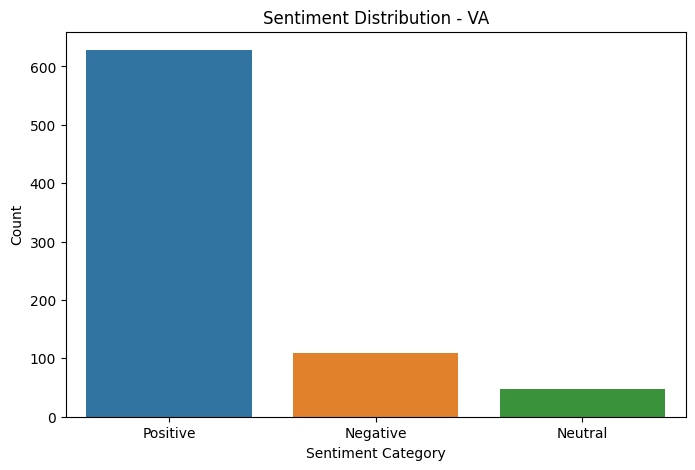

In [19]:
#creating a bar plot based on the categories
plt.figure(figsize=(8, 5))
sns.countplot(data=AngelsAndDemons_Book, x='VASentiment')
plt.title('Sentiment Distribution - VA')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

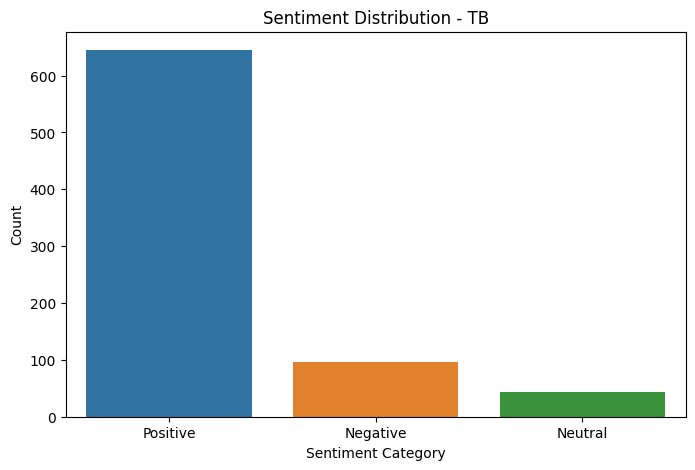

In [21]:
#creating a bar plot based on the categories
plt.figure(figsize=(8, 5))
sns.countplot(data=AngelsAndDemons_Book, x='TBSentiment')
plt.title('Sentiment Distribution - TB')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

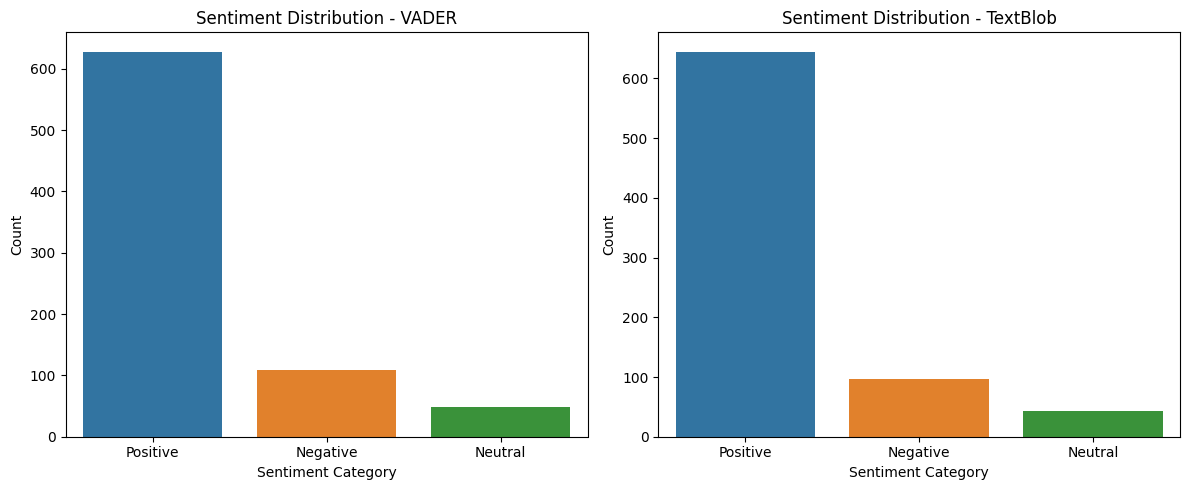

In [23]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(data=AngelsAndDemons_Book, x='VASentiment', ax=axes[0])
axes[0].set_title('Sentiment Distribution - VADER')
axes[0].set_xlabel('Sentiment Category')
axes[0].set_ylabel('Count')
sns.countplot(data=AngelsAndDemons_Book, x='TBSentiment', ax=axes[1])
axes[1].set_title('Sentiment Distribution - TextBlob')
axes[1].set_xlabel('Sentiment Category')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()


In [25]:
vader_counts = AngelsAndDemons_Book['VASentiment'].value_counts()
print("VADER Sentiment Counts:")
print(vader_counts)

VADER Sentiment Counts:
Positive    628
Negative    109
Neutral      48
Name: VASentiment, dtype: int64


In [28]:
tb_counts = AngelsAndDemons_Book['TBSentiment'].value_counts()
print("TB Sentiment Counts:")
print(tb_counts)

TB Sentiment Counts:
Positive    645
Negative     97
Neutral      43
Name: TBSentiment, dtype: int64


In [31]:
vader_analyzer = SentimentIntensityAnalyzer()
def hybrid_sentiment(row):
    vader_sentiment = row['VASentiment']
    textblob_sentiment = row['TBSentiment']
    if vader_sentiment == textblob_sentiment:
        return vader_sentiment
    if vader_sentiment == 'Neutral':
        return textblob_sentiment
    if textblob_sentiment == 'Neutral':
        return vader_sentiment
    
    # Example: If analyzers disagree, take the one with the stronger sentiment
    vader_compound = vader_analyzer.polarity_scores(row['PreprocessedReviews'])['compound']
    textblob_polarity = TextBlob(row['PreprocessedReviews']).sentiment.polarity
    
    if abs(vader_compound) > abs(textblob_polarity):
        return vader_sentiment
    else:
        return textblob_sentiment
AngelsAndDemons_Book['Hybrid_SentimentTBVA'] = AngelsAndDemons_Book.apply(hybrid_sentiment, axis=1)


In [32]:
AngelsAndDemons_Book['Hybrid_SentimentTBVA']

0      Positive
2      Negative
3      Positive
4      Positive
6      Positive
         ...   
991    Negative
996    Positive
997    Positive
998    Positive
999    Positive
Name: Hybrid_SentimentTBVA, Length: 785, dtype: object

In [34]:
hb_counts = AngelsAndDemons_Book['Hybrid_SentimentTBVA'].value_counts()
print("Hybrid - TB&VA Sentiment Counts:")
print(hb_counts)

Hybrid - TB&VA Sentiment Counts:
Positive    648
Negative    111
Neutral      26
Name: Hybrid_SentimentTBVA, dtype: int64


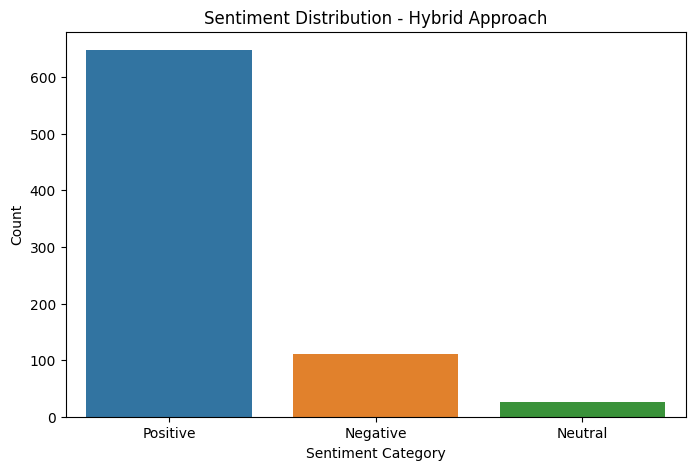

In [35]:
#creating a bar plot based on the categories
plt.figure(figsize=(8, 5))
sns.countplot(data=AngelsAndDemons_Book, x='Hybrid_SentimentTBVA')
plt.title('Sentiment Distribution - Hybrid Approach')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

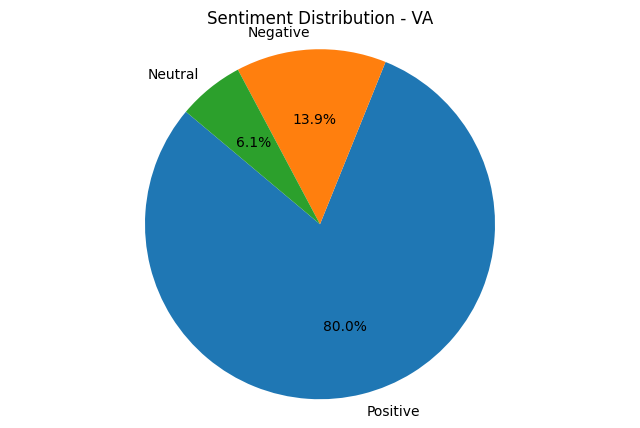

In [36]:
sentiment_counts = AngelsAndDemons_Book['VASentiment'].value_counts()
plt.figure(figsize=(8, 5))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution - VA')
plt.axis('equal') 
plt.show()

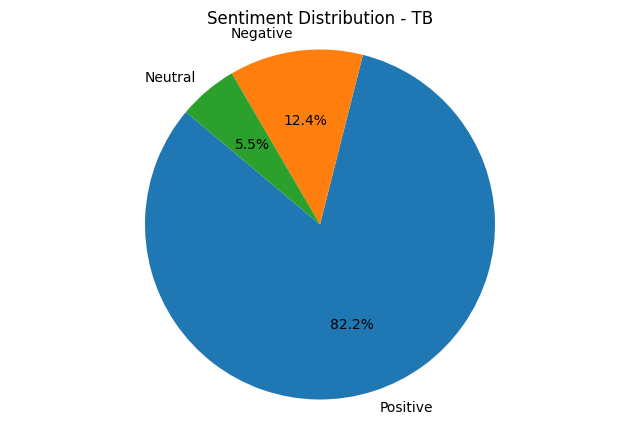

In [38]:
sentiment_counts = AngelsAndDemons_Book['TBSentiment'].value_counts()
plt.figure(figsize=(8, 5))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution - TB')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()

In [40]:
def categorize_reviews(rating):
    if rating <= 2.5:
        return 'Negative'
    elif rating <= 3.5:
        return 'Neutral'
    else:
        return 'Positive'

AngelsAndDemons_Book['bReviewCategory'] = AngelsAndDemons_Book['bRating'].apply(categorize_reviews)

print(AngelsAndDemons_Book)

                                                  bURL  bRating  \
0    https://app.thestorygraph.com/book_reviews/4d0...      5.0   
2    https://app.thestorygraph.com/book_reviews/4d0...      5.0   
3    https://app.thestorygraph.com/book_reviews/4d0...      5.0   
4    https://app.thestorygraph.com/book_reviews/4d0...      3.0   
6    https://app.thestorygraph.com/book_reviews/4d0...      4.0   
..                                                 ...      ...   
991  https://app.thestorygraph.com/book_reviews/4d0...      4.5   
996  https://app.thestorygraph.com/book_reviews/4d0...      5.0   
997  https://app.thestorygraph.com/book_reviews/4d0...      4.0   
998  https://app.thestorygraph.com/book_reviews/4d0...      5.0   
999  https://app.thestorygraph.com/book_reviews/4d0...      2.0   

                                               bReview  \
0    I've watched the movie recently so I've decide...   
2               I am still shocked. Review to come! :)   
3    Angels & Demons 

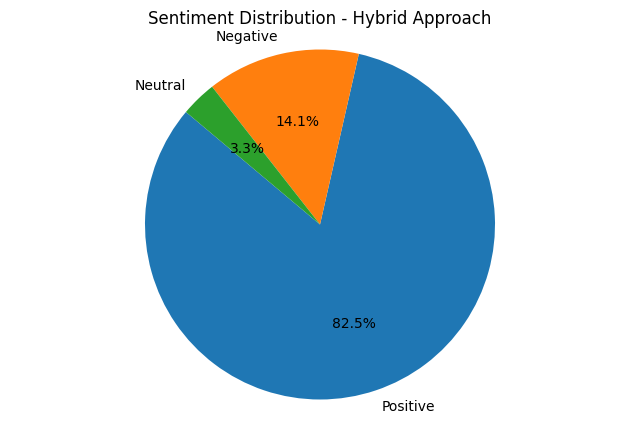

In [100]:
sentiment_counts = AngelsAndDemons_Book['Hybrid_SentimentTBVA'].value_counts()
plt.figure(figsize=(8, 5))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution - Hybrid Approach')
plt.axis('equal')
plt.show()

**Negative Words**

In [112]:
from textblob import TextBlob
from collections import Counter
import pandas as pd

negative_words = []

for review in AngelsAndDemons_Book['PreprocessedReviews']:
    words = TextBlob(review).words
    for word in words:
        word_polarity = TextBlob(word).sentiment.polarity
        if word_polarity < 0:
            negative_words.append(word)
word_counts = Counter(negative_words)
top_negative_words = word_counts.most_common(10)
print("Top 10 Negative Words:")
for word, count in top_negative_words:
    print(f"{word}: {count} times")


Top 10 Negative Words:
little: 87 times
long: 63 times
bad: 52 times
hard: 38 times
less: 32 times
least: 31 times
boring: 31 times
predictable: 27 times
slow: 27 times
wrong: 26 times


**Positive words**

In [115]:
from textblob import TextBlob
from collections import Counter
import pandas as pd

positive_words = []

for review in AngelsAndDemons_Book['PreprocessedReviews']:
    words = TextBlob(review).words
    for word in words:
        word_polarity = TextBlob(word).sentiment.polarity
        if word_polarity > 0:
            positive_words.append(word)

word_counts = Counter(positive_words)
top_positive_words = word_counts.most_common(10)

print("Top 10 Positive Words:")
for word, count in top_positive_words:
    print(f"{word}: {count} times")


Top 10 Positive Words:
really: 289 times
good: 207 times
much: 169 times
first: 169 times
love: 129 times
great: 119 times
loved: 113 times
better: 106 times
enjoyed: 105 times
many: 101 times


In [116]:
from textblob import TextBlob
from collections import Counter
import pandas as pd

positive_words = []
negative_words = []
neutral_words = []

for review in AngelsAndDemons_Book['PreprocessedReviews']:
    words = TextBlob(review).words
    for word in words:
        word_polarity = TextBlob(word).sentiment.polarity
        if word_polarity > 0:
            positive_words.append(word)
        elif word_polarity < 0:
            negative_words.append(word)
        else:
            neutral_words.append(word)

# Count and list the top 10 positive words
word_counts_positive = Counter(positive_words)
top_positive_words = word_counts_positive.most_common(10)

print("Top 10 Positive Words:")
for word, count in top_positive_words:
    print(f"{word}: {count} times")

# Count and list the top 10 negative words
word_counts_negative = Counter(negative_words)
top_negative_words = word_counts_negative.most_common(10)

print("\nTop 10 Negative Words:")
for word, count in top_negative_words:
    print(f"{word}: {count} times")

# Count and list the top 10 neutral words
word_counts_neutral = Counter(neutral_words)
top_neutral_words = word_counts_neutral.most_common(10)

print("\nTop 10 Neutral Words:")
for word, count in top_neutral_words:
    print(f"{word}: {count} times")


Top 10 Positive Words:
really: 289 times
good: 207 times
much: 169 times
first: 169 times
love: 129 times
great: 119 times
loved: 113 times
better: 106 times
enjoyed: 105 times
many: 101 times

Top 10 Negative Words:
little: 87 times
long: 63 times
bad: 52 times
hard: 38 times
less: 32 times
least: 31 times
boring: 31 times
predictable: 27 times
slow: 27 times
wrong: 26 times

Top 10 Neutral Words:
book: 1160 times
read: 615 times
brown: 454 times
one: 337 times
like: 326 times
dan: 324 times
langdon: 309 times
story: 299 times
reading: 242 times
code: 231 times


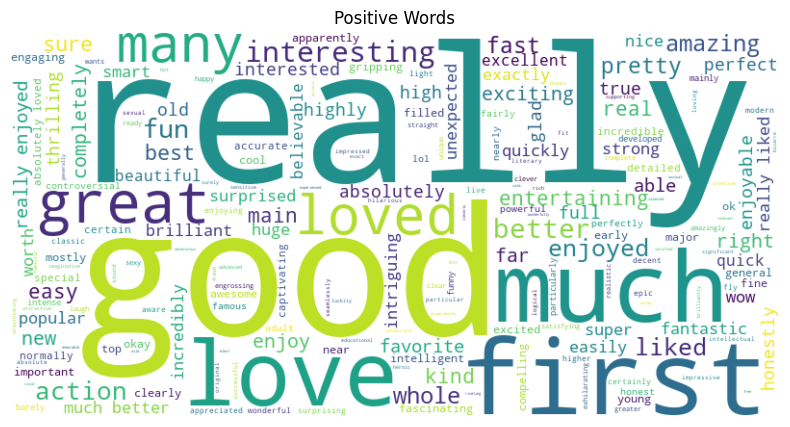

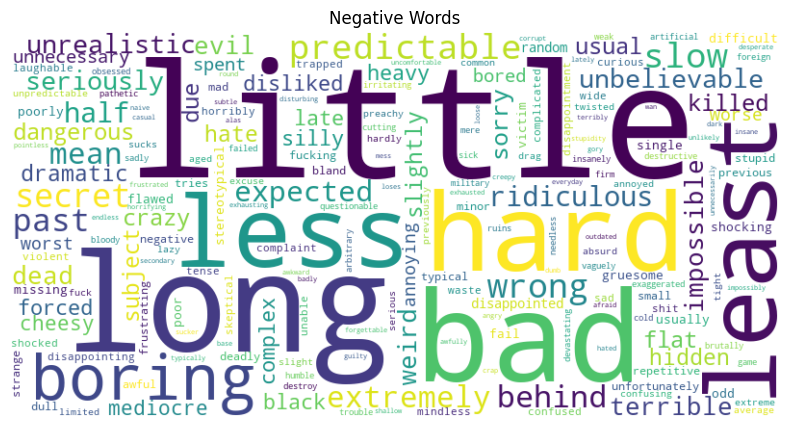

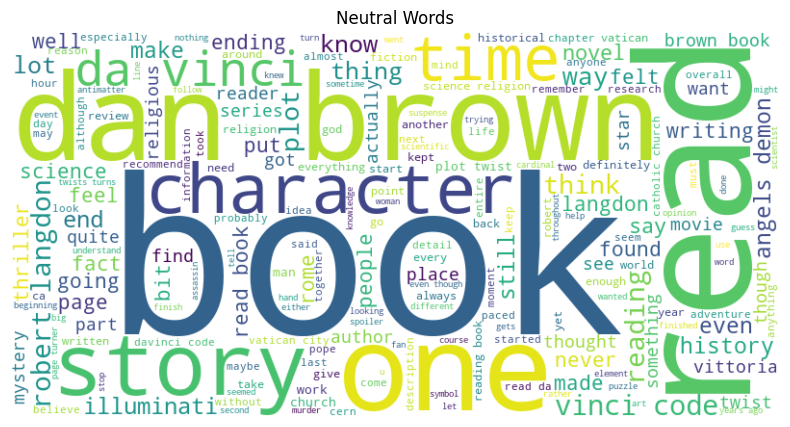

In [117]:
def create_word_cloud(words, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

create_word_cloud(positive_words, "Positive Words")
create_word_cloud(negative_words, "Negative Words")
create_word_cloud(neutral_words, "Neutral Words")

**vader**

In [119]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
import pandas as pd

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

vpositive_words = []
vnegative_words = []
vneutral_words = []

for review in AngelsAndDemons_Book['PreprocessedReviews']:
    words = review.split()  # Split the review into words
    for word in words:
        sentiment_scores = sia.polarity_scores(word)
        compound_score = sentiment_scores['compound']
        
        if compound_score > 0.05:
            vpositive_words.append(word)
        elif compound_score < -0.05:
            vnegative_words.append(word)
        else:
            vneutral_words.append(word)

# Count and list the top 10 positive words
word_counts_positive = Counter(vpositive_words)
top_positive_words = word_counts_positive.most_common(10)

print("Top 10 Positive Words:")
for word, count in top_positive_words:
    print(f"{word}: {count} times")

# Count and list the top 10 negative words
word_counts_negative = Counter(vnegative_words)
top_negative_words = word_counts_negative.most_common(10)

print("\nTop 10 Negative Words:")
for word, count in top_negative_words:
    print(f"{word}: {count} times")

# Count and list the top 10 neutral words
word_counts_neutral = Counter(vneutral_words)
top_neutral_words = word_counts_neutral.most_common(10)

print("\nTop 10 Neutral Words:")
for word, count in top_neutral_words:
    print(f"{word}: {count} times")


Top 10 Positive Words:
like: 326 times
good: 207 times
love: 129 times
well: 127 times
great: 119 times
loved: 113 times
better: 106 times
enjoyed: 105 times
novel: 103 times
interesting: 96 times

Top 10 Negative Words:
bad: 52 times
hard: 38 times
boring: 31 times
wrong: 26 times
stop: 25 times
lost: 25 times
conspiracy: 24 times
murder: 24 times
bomb: 19 times
murdered: 18 times

Top 10 Neutral Words:
book: 1160 times
read: 615 times
brown: 454 times
one: 337 times
dan: 324 times
langdon: 309 times
story: 299 times
really: 289 times
reading: 242 times
code: 231 times


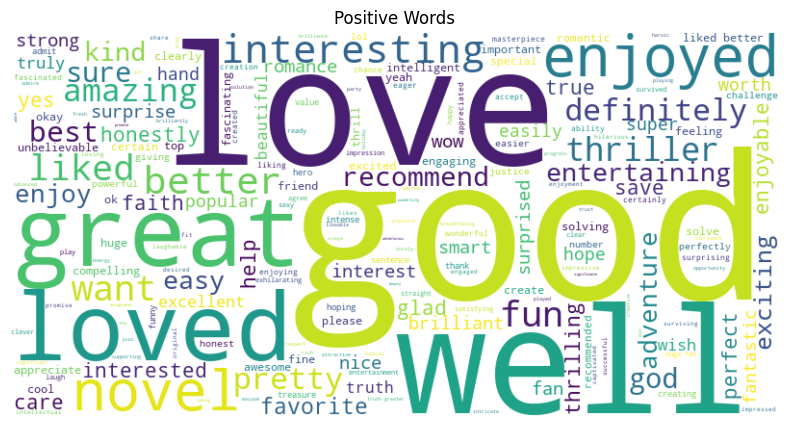

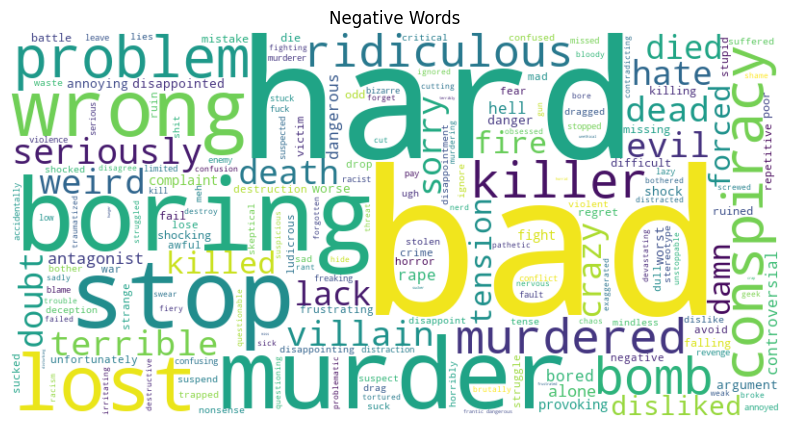

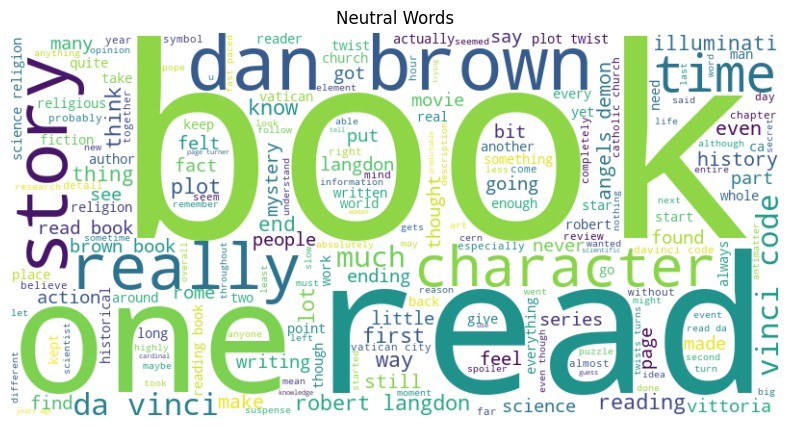

In [120]:
def create_word_cloud(words, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

create_word_cloud(vpositive_words, "Positive Words")
create_word_cloud(vnegative_words, "Negative Words")
create_word_cloud(vneutral_words, "Neutral Words")

In [108]:
def categorize_reviews(rating):
    if rating <= 2.5:
        return 'negative'
    elif rating <= 3.5:
        return 'neutral'
    else:
        return 'positive'

AngelsAndDemons_Book['bReviewCategory'] = AngelsAndDemons_Book['bRating'].apply(categorize_reviews)

print(AngelsAndDemons_Book)

                                                  bURL  bRating  \
0    https://app.thestorygraph.com/book_reviews/4d0...      5.0   
2    https://app.thestorygraph.com/book_reviews/4d0...      5.0   
3    https://app.thestorygraph.com/book_reviews/4d0...      5.0   
4    https://app.thestorygraph.com/book_reviews/4d0...      3.0   
6    https://app.thestorygraph.com/book_reviews/4d0...      4.0   
..                                                 ...      ...   
991  https://app.thestorygraph.com/book_reviews/4d0...      4.5   
996  https://app.thestorygraph.com/book_reviews/4d0...      5.0   
997  https://app.thestorygraph.com/book_reviews/4d0...      4.0   
998  https://app.thestorygraph.com/book_reviews/4d0...      5.0   
999  https://app.thestorygraph.com/book_reviews/4d0...      2.0   

                                               bReview  \
0    I've watched the movie recently so I've decide...   
2               I am still shocked. Review to come! :)   
3    Angels & Demons 

In [109]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import precision_score, f1_score
sia = SentimentIntensityAnalyzer()
text_samples = AngelsAndDemons_Book['bReview']
ground_truth_labels = AngelsAndDemons_Book['bReviewCategory']
vader_predictions = []
for text_sample in text_samples:
    sentiment_scores = sia.polarity_scores(text_sample)
    if sentiment_scores['compound'] >= 0.05:
        vader_predictions.append("positive")
    elif sentiment_scores['compound'] <= -0.05:
        vader_predictions.append("negative")
    else:
        vader_predictions.append("neutral")
precision = precision_score(ground_truth_labels, vader_predictions, average='weighted', labels=['positive', 'negative', 'neutral'])
f1 = f1_score(ground_truth_labels, vader_predictions, average='weighted', labels=['positive', 'negative', 'neutral'])
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")

Precision: 0.53
F1 Score: 0.54


In [110]:
import pandas as pd
from textblob import TextBlob
from sklearn.metrics import precision_score, f1_score
text_samples = AngelsAndDemons_Book['bReview']
ground_truth_labels = AngelsAndDemons_Book['bReviewCategory']
textblob_predictions = []

for text_sample in text_samples:
    analysis = TextBlob(text_sample)
    if analysis.sentiment.polarity > 0:
        textblob_predictions.append("positive")
    elif analysis.sentiment.polarity < 0:
        textblob_predictions.append("negative")
    else:
        textblob_predictions.append("neutral")
precision = precision_score(ground_truth_labels, textblob_predictions, average='weighted', labels=['positive', 'negative', 'neutral'])
f1 = f1_score(ground_truth_labels, textblob_predictions, average='weighted', labels=['positive', 'negative', 'neutral'])

print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")


Precision: 0.54
F1 Score: 0.55


C:\Users\Ajay\AppData\Local\Temp\ipykernel_55636\2956543350.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sentiment_scores, shade=True, color='skyblue')


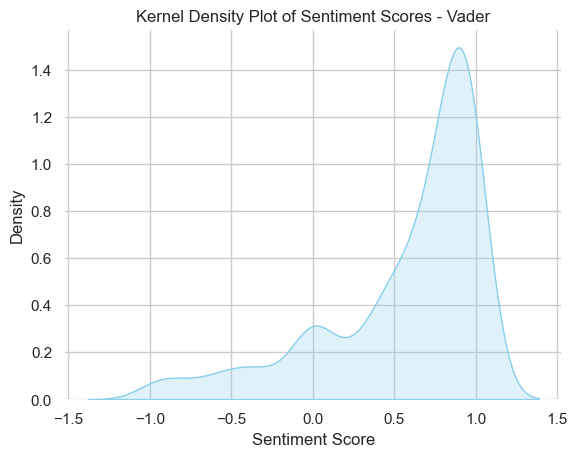

In [188]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  # Import matplotlib for plotting
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

sentiment_scores = []

for index, row in AngelsAndDemons_Book.iterrows():
    review_text = row['PreprocessedReviews']
    sentiment_scores.append(analyzer.polarity_scores(review_text)['compound'])
sns.set(style="whitegrid")
sns.kdeplot(sentiment_scores, shade=True, color='skyblue')
sns.despine(left=True, bottom=True)
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Sentiment Scores - Vader')

plt.show()


**Text blob**

C:\Users\Ajay\AppData\Local\Temp\ipykernel_55636\217050491.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sentiment_scores, shade=True, color='skyblue')


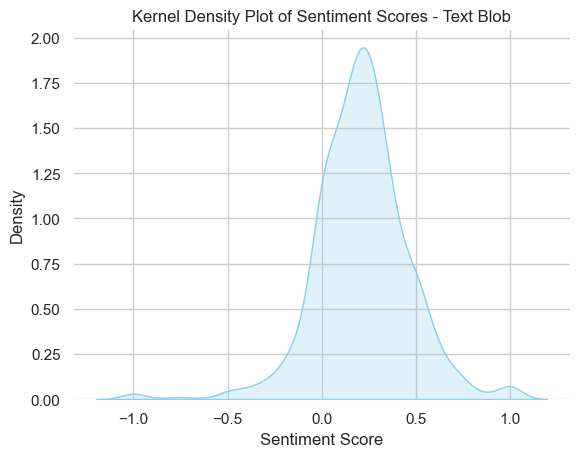

In [187]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob  

sentiment_scores = []
for index, row in AngelsAndDemons_Book.iterrows():
    review_text = row['PreprocessedReviews']
    sentiment = TextBlob(review_text).sentiment.polarity
    sentiment_scores.append(sentiment)

sns.set(style="whitegrid")
sns.kdeplot(sentiment_scores, shade=True, color='skyblue')
sns.despine(left=True, bottom=True)
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Sentiment Scores - Text Blob')

plt.show()


C:\Users\Ajay\AppData\Local\Temp\ipykernel_55636\2634146102.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(textblob_sentiment_scores, shade=True, color='skyblue', label='Text Blob')
C:\Users\Ajay\AppData\Local\Temp\ipykernel_55636\2634146102.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(vader_sentiment_scores, shade=True, color='orange', label='Vader')


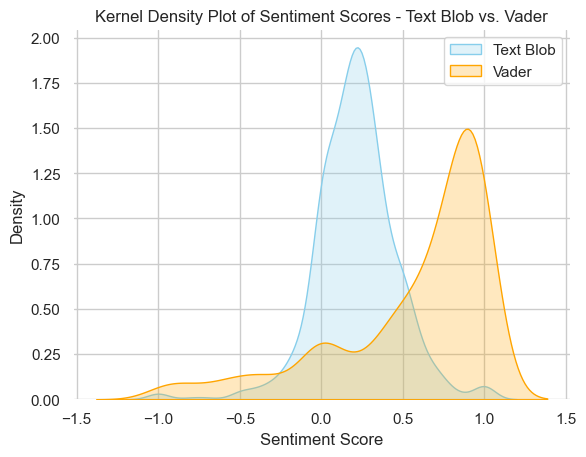

In [192]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


textblob_sentiment_scores = []
vader_sentiment_scores = []

analyzer = SentimentIntensityAnalyzer()
for index, row in AngelsAndDemons_Book.iterrows():
    review_text = row['PreprocessedReviews']
    textblob_sentiment = TextBlob(review_text).sentiment.polarity
    textblob_sentiment_scores.append(textblob_sentiment)
    vader_sentiment = analyzer.polarity_scores(review_text)['compound']
    vader_sentiment_scores.append(vader_sentiment)
sns.set(style="whitegrid")
sns.kdeplot(textblob_sentiment_scores, shade=True, color='skyblue', label='Text Blob')
sns.kdeplot(vader_sentiment_scores, shade=True, color='orange', label='Vader')
sns.despine(left=True, bottom=True)
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Sentiment Scores - Text Blob vs. Vader')
plt.legend()

plt.show()


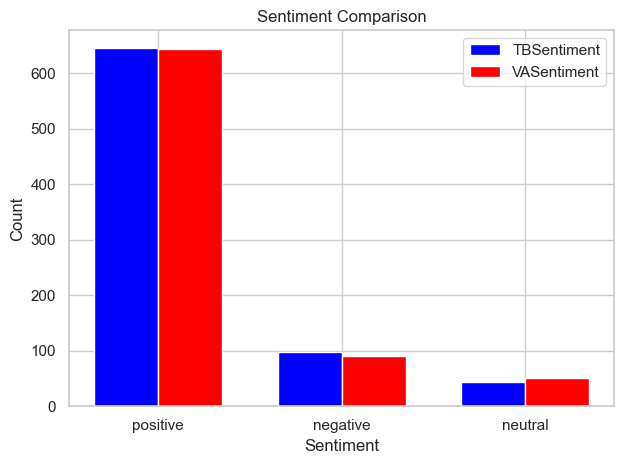

In [197]:
import matplotlib.pyplot as plt
tb_counts = AngelsAndDemons_Book["TBSentiment"].value_counts()
va_counts = AngelsAndDemons_Book["VASentiment"].value_counts()
categories = ["positive", "negative", "neutral"]
bar_width = 0.35
x = range(len(categories))

plt.bar(x, tb_counts, bar_width, label='TBSentiment', color='blue', align='center')
plt.bar([i + bar_width for i in x], va_counts, bar_width, label='VASentiment', color='red', align='center')

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Comparison')
plt.xticks([i + bar_width/2 for i in x], categories)
plt.legend()

plt.tight_layout()
plt.show()


**Movies Section**

In [3]:
firefox_options = Options()
firefox_options.add_argument('-headless')
firefox_binary_path = r"C:\Program Files\Mozilla Firefox\firefox.exe"
firefox_options.binary_location = firefox_binary_path
service = Service(executable_path=r"C:\Users\Ajay\Downloads\geckodriver-v0.33.0-win32\geckodriver.exe")
driver = webdriver.Firefox(service=service, options=firefox_options)
reviews_to_collect = 195 
reviews_collected = 0
data = []  
url = "https://www.imdb.com/title/tt0808151/reviews/?ref_=tt_ql_2"
try:
    driver.get(url)
    while reviews_collected < reviews_to_collect:
        try:
            loadMoreBtn = WebDriverWait(driver, 60).until(
                EC.element_to_be_clickable((By.ID, 'load-more-trigger'))
            )
            if loadMoreBtn:
                loadMoreBtn.click()
                print('Button clicked')
                
                WebDriverWait(driver, 30).until(
                    EC.presence_of_all_elements_located((By.XPATH, '//div[@class="content"]'))
                )
                
                reviews = driver.find_elements(By.XPATH, '//div[@class="review-container"]/div/a')
                ratings = driver.find_elements(By.XPATH, '//span[@class="rating-other-user-rating"]/span[1]')
                
                for review, rating in zip(reviews, ratings):
                    review_text = review.text
                    rating_text = rating.text
                    if rating_text and review_text:
                        url_rating_review = (url, rating_text, review_text)
                        data.append(url_rating_review)
                        reviews_collected += 1
                        print(f"Collected {reviews_collected} reviews")
                        if reviews_collected >= reviews_to_collect:
                            break
        except Exception as e:
            print(f"Error while scraping {url}: {e}")
            break

except Exception as e:
    print(f"Error: {e}")

finally:
    driver.quit()

AngelsAndDemons_Movie = pd.DataFrame(data, columns=["mURL", "mRating", "mReview"])

Button clicked
Collected 1 reviews
Collected 2 reviews
Collected 3 reviews
Collected 4 reviews
Collected 5 reviews
Collected 6 reviews
Collected 7 reviews
Collected 8 reviews
Collected 9 reviews
Collected 10 reviews
Collected 11 reviews
Collected 12 reviews
Collected 13 reviews
Collected 14 reviews
Collected 15 reviews
Collected 16 reviews
Collected 17 reviews
Collected 18 reviews
Collected 19 reviews
Collected 20 reviews
Collected 21 reviews
Collected 22 reviews
Collected 23 reviews
Collected 24 reviews
Button clicked
Collected 25 reviews
Collected 26 reviews
Collected 27 reviews
Collected 28 reviews
Collected 29 reviews
Collected 30 reviews
Collected 31 reviews
Collected 32 reviews
Collected 33 reviews
Collected 34 reviews
Collected 35 reviews
Collected 36 reviews
Collected 37 reviews
Collected 38 reviews
Collected 39 reviews
Collected 40 reviews
Collected 41 reviews
Collected 42 reviews
Collected 43 reviews
Collected 44 reviews
Collected 45 reviews
Collected 46 reviews
Collected 47 

In [4]:
AngelsAndDemons_Movie['mReview']

0                                     Pull the other one
1                     A Nutshell Review: Angels & Demons
2      10 Reasons Why This Film Took a Belly Flop in ...
3         worth watching but could have been done better
4                          I wish I hadn't read the book
                             ...                        
190                                 Not at all impressed
191      Okay. The problem with this movie is I like it.
192    Fast and exciting. a slight improvement over T...
193                  I liked the DaVinci Code better....
194    An amazing and intelligent thriller, one of th...
Name: mReview, Length: 195, dtype: object

In [5]:
AngelsAndDemons_Movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   mURL     195 non-null    object
 1   mRating  195 non-null    object
 2   mReview  195 non-null    object
dtypes: object(3)
memory usage: 4.7+ KB


In [6]:
#Checking null values

missing_counts = AngelsAndDemons_Movie.isnull().sum()
print(missing_counts)

mURL       0
mRating    0
mReview    0
dtype: int64


In [7]:
#since no null values I'll convert the ratings column to float
AngelsAndDemons_Movie['mRating'] = AngelsAndDemons_Movie['mRating'].astype('float') 
AngelsAndDemons_Movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   mURL     195 non-null    object 
 1   mRating  195 non-null    float64
 2   mReview  195 non-null    object 
dtypes: float64(1), object(2)
memory usage: 4.7+ KB


In [8]:
AngelsAndDemons_Movie['mRating'].mean()

5.605128205128205

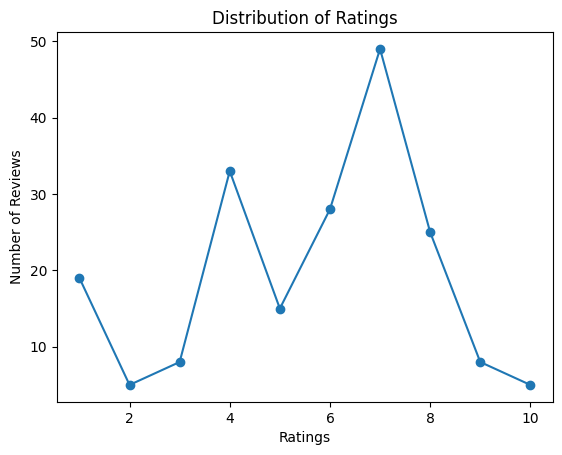

In [11]:
AngelsAndDemons_Counts = AngelsAndDemons_Movie['mRating'].value_counts().sort_index()
plt.plot(AngelsAndDemons_Counts.index, AngelsAndDemons_Counts.values, marker='o')

plt.xlabel('Ratings')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Ratings')

plt.show()

In [14]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    cleaned_text = ' '.join(tokens)
    return cleaned_text
AngelsAndDemons_Movie['PreprocessedReviews'] = AngelsAndDemons_Movie['mReview'].apply(preprocess_text)
print(AngelsAndDemons_Movie)


                                                  mURL  mRating  \
0    https://www.imdb.com/title/tt0808151/reviews/?...      5.0   
1    https://www.imdb.com/title/tt0808151/reviews/?...      7.0   
2    https://www.imdb.com/title/tt0808151/reviews/?...      1.0   
3    https://www.imdb.com/title/tt0808151/reviews/?...      8.0   
4    https://www.imdb.com/title/tt0808151/reviews/?...      5.0   
..                                                 ...      ...   
190  https://www.imdb.com/title/tt0808151/reviews/?...      7.0   
191  https://www.imdb.com/title/tt0808151/reviews/?...      7.0   
192  https://www.imdb.com/title/tt0808151/reviews/?...      4.0   
193  https://www.imdb.com/title/tt0808151/reviews/?...      4.0   
194  https://www.imdb.com/title/tt0808151/reviews/?...      4.0   

                                               mReview  \
0                                   Pull the other one   
1                   A Nutshell Review: Angels & Demons   
2    10 Reasons Why T

In [15]:
nltk.download('punkt')
stemmer = PorterStemmer()
def stem_text(text):
    words = nltk.word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text
AngelsAndDemons_Movie['StemmedReviews'] = AngelsAndDemons_Movie['PreprocessedReviews'].apply(stem_text)
print(AngelsAndDemons_Movie[['PreprocessedReviews', 'StemmedReviews']])

                                PreprocessedReviews  \
0                                          pull one   
1                     nutshell review angels demons   
2          reasons film took belly flop tiber river   
3                  worth watching could done better   
4                                    wish read book   
..                                              ...   
190                                       impressed   
191                         okay problem movie like   
192  fast exciting slight improvement da vinci code   
193                       liked davinci code better   
194     amazing intelligent thriller one best years   

                              StemmedReviews  
0                                   pull one  
1                 nutshel review angel demon  
2    reason film took belli flop tiber river  
3              worth watch could done better  
4                             wish read book  
..                                       ...  
190       

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ajay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
from langdetect import detect
def detect_language(text):
    try:
        lang = detect(text)
        return lang == 'en'
    except:
        return False

AngelsAndDemons_Movie['IsEnglish'] = AngelsAndDemons_Movie['PreprocessedReviews'].apply(detect_language)
AngelsAndDemons_Movie = AngelsAndDemons_Movie[AngelsAndDemons_Movie['IsEnglish']]


In [18]:
AngelsAndDemons_Movie

mURL  mRating  \
1    https://www.imdb.com/title/tt0808151/reviews/?...      7.0   
2    https://www.imdb.com/title/tt0808151/reviews/?...      1.0   
3    https://www.imdb.com/title/tt0808151/reviews/?...      8.0   
4    https://www.imdb.com/title/tt0808151/reviews/?...      5.0   
5    https://www.imdb.com/title/tt0808151/reviews/?...      7.0   
..                                                 ...      ...   
186  https://www.imdb.com/title/tt0808151/reviews/?...      9.0   
188  https://www.imdb.com/title/tt0808151/reviews/?...      4.0   
189  https://www.imdb.com/title/tt0808151/reviews/?...      8.0   
192  https://www.imdb.com/title/tt0808151/reviews/?...      4.0   
194  https://www.imdb.com/title/tt0808151/reviews/?...      4.0   

                                               mReview  \
1                   A Nutshell Review: Angels & Demons   
2    10 Reasons Why This Film Took a Belly Flop in ...   
3       worth watching but could have been done better   
4                        I wish I hadn't read the book   
5                            A Pretty Good Action Film   
..                                                 ...   
186  it's not something to get excited about either...   
188  Outstanding Film That May Help Americans Learn...   
189       The Text, Vic ! ! ! Don't Say The Text ! ! !   
192  Fast and exciting. a slight improvement over T...   
194  An amazing and intelligent thriller, one of th...   

                                   PreprocessedReviews  \
1                        nutshell review angels demons   
2             reasons film took belly flop tiber river   
3                     worth watching could done better   
4                                       wish read book   
5                              pretty good action film   
..                                                 ...   
186                   something get excited either way   
188  outstanding film may help americans learn relg...   
189                                  text vic say text   
192     fast exciting slight improvement da vinci code   
194        amazing intelligent thriller one best years   

                                        StemmedReviews  IsEnglish  
1                           nutshel review angel demon       True  
2              reason film took belli flop tiber river       True  
3                        worth watch could done better       True  
4                                       wish read book       True  
5                              pretti good action film       True  
..                                                 ...        ...  
186                        someth get excit either way       True  
188  outstand film may help american learn relgiou ...       True  
189                                  text vic say text       True  
192             fast excit slight improv da vinci code       True  
194               amaz intellig thriller one best year       True  

[111 rows x 6 columns]

In [19]:
def categorize_reviews(rating):
    if rating <= 4.5:
        return 'Poor'
    elif rating <= 7.5:
        return 'Average'
    else:
        return 'Good'

AngelsAndDemons_Movie['mReviewCategory'] = AngelsAndDemons_Movie['mRating'].apply(categorize_reviews)

print(AngelsAndDemons_Movie)

                                                  mURL  mRating  \
1    https://www.imdb.com/title/tt0808151/reviews/?...      7.0   
2    https://www.imdb.com/title/tt0808151/reviews/?...      1.0   
3    https://www.imdb.com/title/tt0808151/reviews/?...      8.0   
4    https://www.imdb.com/title/tt0808151/reviews/?...      5.0   
5    https://www.imdb.com/title/tt0808151/reviews/?...      7.0   
..                                                 ...      ...   
186  https://www.imdb.com/title/tt0808151/reviews/?...      9.0   
188  https://www.imdb.com/title/tt0808151/reviews/?...      4.0   
189  https://www.imdb.com/title/tt0808151/reviews/?...      8.0   
192  https://www.imdb.com/title/tt0808151/reviews/?...      4.0   
194  https://www.imdb.com/title/tt0808151/reviews/?...      4.0   

                                               mReview  \
1                   A Nutshell Review: Angels & Demons   
2    10 Reasons Why This Film Took a Belly Flop in ...   
3       worth watchin

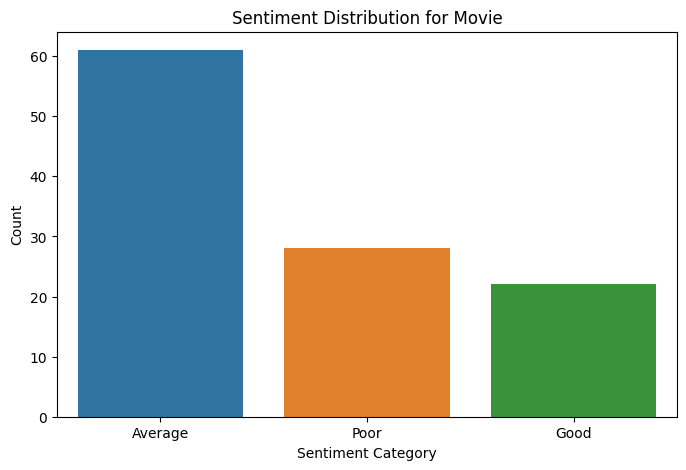

In [21]:
#creating a bar plot based on the categories
plt.figure(figsize=(8, 5))
sns.countplot(data=AngelsAndDemons_Movie, x='mReviewCategory')
plt.title('Sentiment Distribution for Movie')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

In [24]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

for index, row in AngelsAndDemons_Movie.iterrows():
    review_text = row['mReview']
    sentiment_scores = analyzer.polarity_scores(review_text)
    
    if sentiment_scores['compound'] >= 0.05:
        vasentiment = 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        vasentiment = 'Negative'
    else:
        vasentiment = 'Neutral'
    
    AngelsAndDemons_Movie.at[index, 'VASentiment'] = vasentiment

print(AngelsAndDemons_Movie[['mRating','mReview', 'VASentiment']])


     mRating                                            mReview VASentiment
1        7.0                 A Nutshell Review: Angels & Demons     Neutral
2        1.0  10 Reasons Why This Film Took a Belly Flop in ...    Negative
3        8.0     worth watching but could have been done better    Positive
4        5.0                      I wish I hadn't read the book    Positive
5        7.0                          A Pretty Good Action Film    Positive
..       ...                                                ...         ...
186      9.0  it's not something to get excited about either...    Positive
188      4.0  Outstanding Film That May Help Americans Learn...    Positive
189      8.0       The Text, Vic ! ! ! Don't Say The Text ! ! !     Neutral
192      4.0  Fast and exciting. a slight improvement over T...    Positive
194      4.0  An amazing and intelligent thriller, one of th...    Positive

[111 rows x 3 columns]


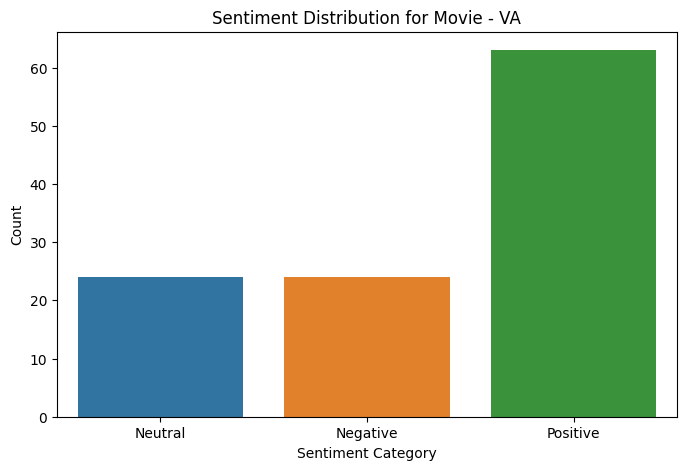

In [25]:
#creating a bar plot based on the categories
plt.figure(figsize=(8, 5))
sns.countplot(data=AngelsAndDemons_Movie, x='VASentiment')
plt.title('Sentiment Distribution for Movie - VA')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

In [26]:
from textblob import TextBlob
def get_sentiment_polarity(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'
AngelsAndDemons_Movie['TBSentiment'] = AngelsAndDemons_Movie['PreprocessedReviews'].apply(get_sentiment_polarity)

print(AngelsAndDemons_Movie[['mRating', 'PreprocessedReviews', 'TBSentiment']])


     mRating                                PreprocessedReviews TBSentiment
1        7.0                      nutshell review angels demons     Neutral
2        1.0           reasons film took belly flop tiber river     Neutral
3        8.0                   worth watching could done better    Positive
4        5.0                                     wish read book     Neutral
5        7.0                            pretty good action film    Positive
..       ...                                                ...         ...
186      9.0                   something get excited either way    Positive
188      4.0  outstanding film may help americans learn relg...    Positive
189      8.0                                  text vic say text     Neutral
192      4.0     fast exciting slight improvement da vinci code    Positive
194      4.0        amazing intelligent thriller one best years    Positive

[111 rows x 3 columns]


In [27]:
from textblob import TextBlob

def get_sentiment_polarity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

AngelsAndDemons_Movie['SentimentScore'] = AngelsAndDemons_Movie['PreprocessedReviews'].apply(get_sentiment_polarity)

print(AngelsAndDemons_Movie[['mRating', 'PreprocessedReviews', 'SentimentScore']])


     mRating                                PreprocessedReviews  \
1        7.0                      nutshell review angels demons   
2        1.0           reasons film took belly flop tiber river   
3        8.0                   worth watching could done better   
4        5.0                                     wish read book   
5        7.0                            pretty good action film   
..       ...                                                ...   
186      9.0                   something get excited either way   
188      4.0  outstanding film may help americans learn relg...   
189      8.0                                  text vic say text   
192      4.0     fast exciting slight improvement da vinci code   
194      4.0        amazing intelligent thriller one best years   

     SentimentScore  
1          0.000000  
2          0.000000  
3          0.400000  
4          0.000000  
5          0.350000  
..              ...  
186        0.375000  
188        0.500000

In [28]:
AngelsAndDemons_Movie['PreprocessedReviews']

1                          nutshell review angels demons
2               reasons film took belly flop tiber river
3                       worth watching could done better
4                                         wish read book
5                                pretty good action film
                             ...                        
186                     something get excited either way
188    outstanding film may help americans learn relg...
189                                    text vic say text
192       fast exciting slight improvement da vinci code
194          amazing intelligent thriller one best years
Name: PreprocessedReviews, Length: 111, dtype: object

In [29]:
from textblob import TextBlob
from collections import Counter
import pandas as pd

positive_wordsmTB = []
negative_wordsmTB = []
neutral_wordsmTB = []

for review in AngelsAndDemons_Movie['PreprocessedReviews']:
    words = TextBlob(review).words
    for word in words:
        word_polarity = TextBlob(word).sentiment.polarity
        if word_polarity > 0:
            positive_wordsmTB.append(word)
        elif word_polarity < 0:
            negative_wordsmTB.append(word)
        else:
            neutral_wordsmTB.append(word)

# Count and list the top 10 positive words
word_counts_positive = Counter(positive_wordsmTB)
top_positive_words = word_counts_positive.most_common(10)

print("Top 10 Positive Words:")
for word, count in top_positive_words:
    print(f"{word}: {count} times")

# Count and list the top 10 negative words
word_counts_negative = Counter(negative_wordsmTB)
top_negative_words = word_counts_negative.most_common(10)

print("\nTop 10 Negative Words:")
for word, count in top_negative_words:
    print(f"{word}: {count} times")

# Count and list the top 10 neutral words
word_counts_neutral = Counter(neutral_wordsmTB)
top_neutral_words = word_counts_neutral.most_common(10)

print("\nTop 10 Neutral Words:")
for word, count in top_neutral_words:
    print(f"{word}: {count} times")


Top 10 Positive Words:
good: 10 times
spectacular: 7 times
better: 6 times
worth: 4 times
pretty: 4 times
action: 4 times
pleased: 4 times
brilliant: 4 times
enjoy: 4 times
adequate: 4 times

Top 10 Negative Words:
needless: 4 times
terrible: 3 times
least: 3 times
worse: 3 times
dirty: 2 times
slightly: 2 times
slight: 2 times
bad: 1 times
boring: 1 times
long: 1 times

Top 10 Neutral Words:
film: 13 times
angels: 11 times
demons: 11 times
book: 10 times
movie: 10 times
thriller: 10 times
code: 10 times
da: 10 times
vinci: 10 times
howard: 9 times


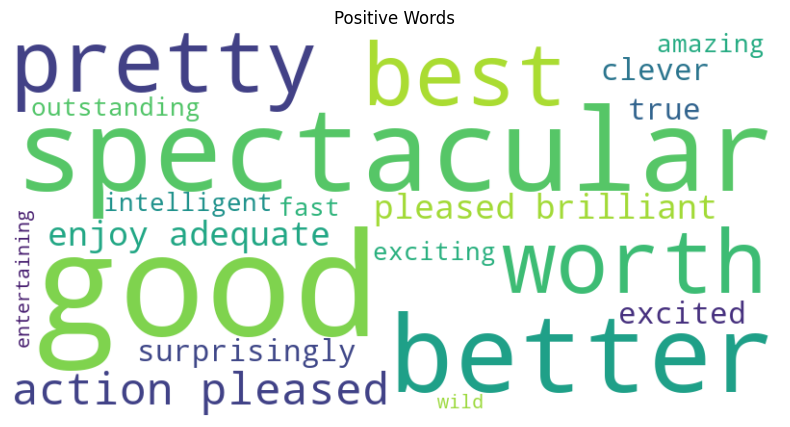

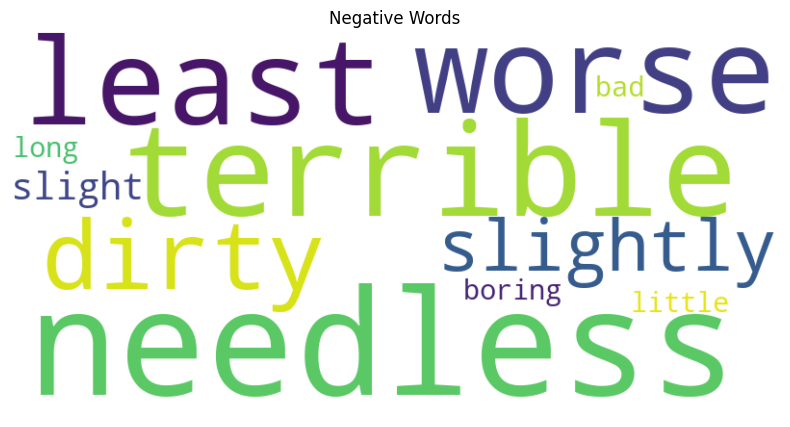

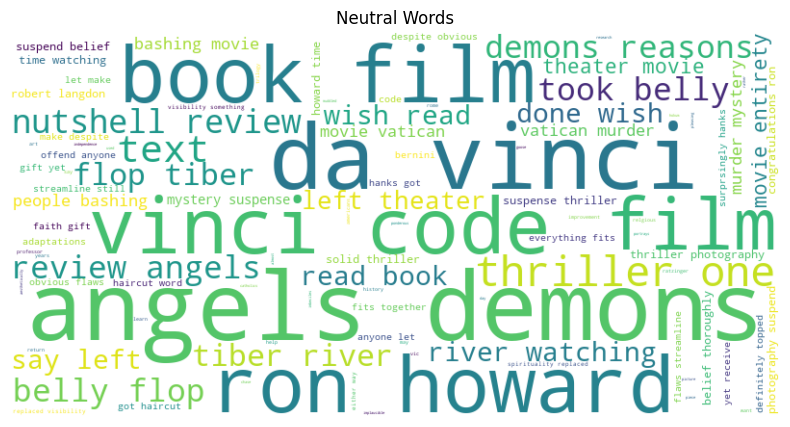

In [30]:
def create_word_cloud(words, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

create_word_cloud(positive_wordsmTB, "Positive Words")
create_word_cloud(negative_wordsmTB, "Negative Words")
create_word_cloud(neutral_wordsmTB, "Neutral Words")


**Vader top 10**

In [32]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
import pandas as pd

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

vmpositive_words = []
vmnegative_words = []
vmneutral_words = []

for review in AngelsAndDemons_Movie['PreprocessedReviews']:
    words = review.split()  # Split the review into words
    for word in words:
        sentiment_scores = sia.polarity_scores(word)
        compound_score = sentiment_scores['compound']
        
        if compound_score > 0.05:
            vmpositive_words.append(word)
        elif compound_score < -0.05:
            vmnegative_words.append(word)
        else:
            vmneutral_words.append(word)

# Count and list the top 10 positive words
word_counts_positive = Counter(vmpositive_words)
top_positive_words = word_counts_positive.most_common(10)

print("Top 10 Positive Words:")
for word, count in top_positive_words:
    print(f"{word}: {count} times")

# Count and list the top 10 negative words
word_counts_negative = Counter(vmnegative_words)
top_negative_words = word_counts_negative.most_common(10)

print("\nTop 10 Negative Words:")
for word, count in top_negative_words:
    print(f"{word}: {count} times")

# Count and list the top 10 neutral words
word_counts_neutral = Counter(vmneutral_words)
top_neutral_words = word_counts_neutral.most_common(10)

print("\nTop 10 Neutral Words:")
for word, count in top_neutral_words:
    print(f"{word}: {count} times")


Top 10 Positive Words:
good: 10 times
thriller: 10 times
better: 6 times
worth: 4 times
wish: 4 times
pretty: 4 times
pleased: 4 times
brilliant: 4 times
enjoy: 4 times
congratulations: 4 times

Top 10 Negative Words:
flop: 4 times
murder: 4 times
suspend: 4 times
offend: 3 times
terrible: 3 times
worse: 3 times
dirty: 2 times
bad: 1 times
boring: 1 times

Top 10 Neutral Words:
film: 13 times
angels: 11 times
demons: 11 times
book: 10 times
movie: 10 times
code: 10 times
da: 10 times
vinci: 10 times
howard: 9 times
watching: 8 times


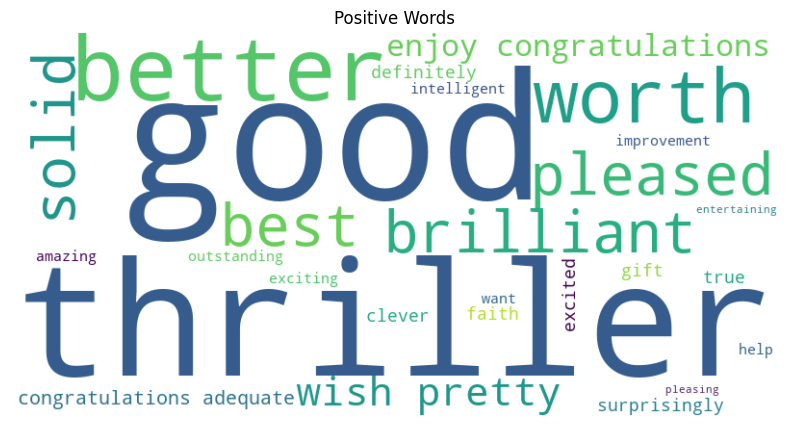

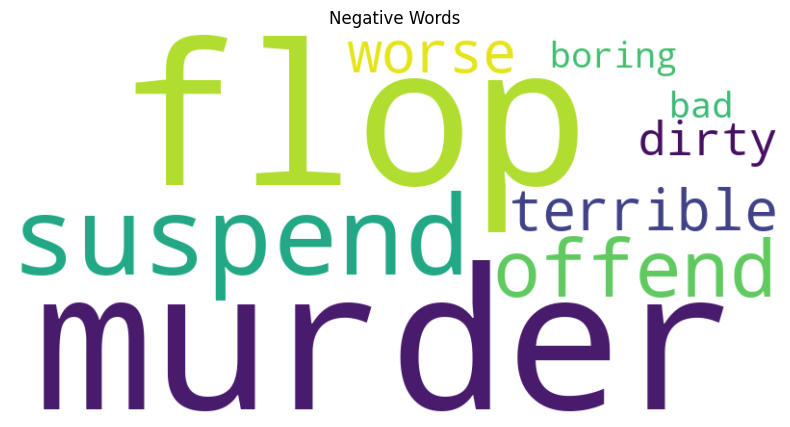

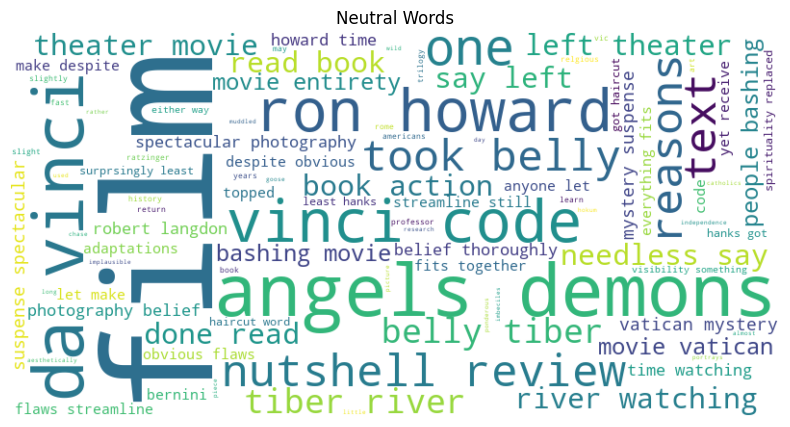

In [33]:
def create_word_cloud(words, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

create_word_cloud(vmpositive_words, "Positive Words")
create_word_cloud(vmnegative_words, "Negative Words")
create_word_cloud(vmneutral_words, "Neutral Words")


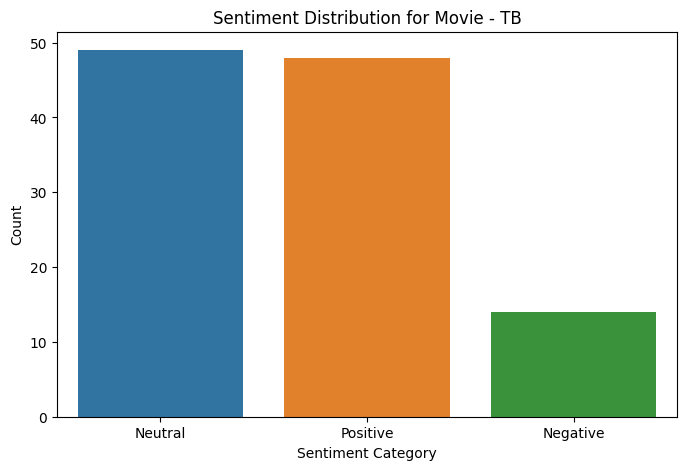

In [34]:
#creating a bar plot based on the categories
plt.figure(figsize=(8, 5))
sns.countplot(data=AngelsAndDemons_Movie, x='TBSentiment')
plt.title('Sentiment Distribution for Movie - TB')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

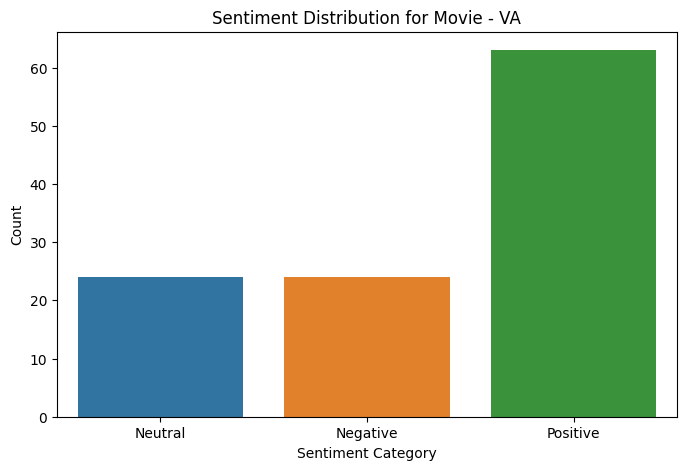

In [35]:
#creating a bar plot based on the categories
plt.figure(figsize=(8, 5))
sns.countplot(data=AngelsAndDemons_Movie, x='VASentiment')
plt.title('Sentiment Distribution for Movie - VA')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

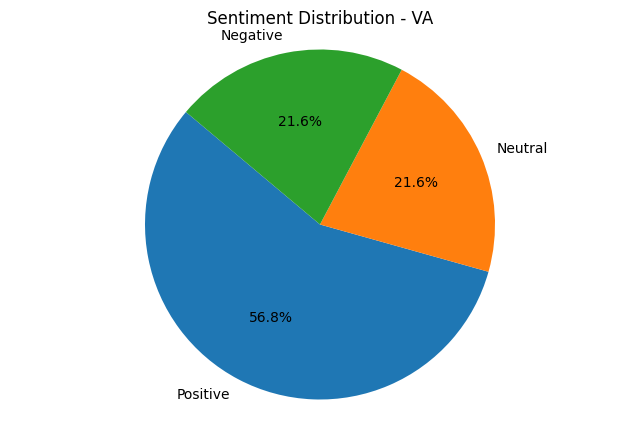

In [36]:
sentiment_counts = AngelsAndDemons_Movie['VASentiment'].value_counts()
plt.figure(figsize=(8, 5))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution - VA')
plt.axis('equal') 
plt.show()

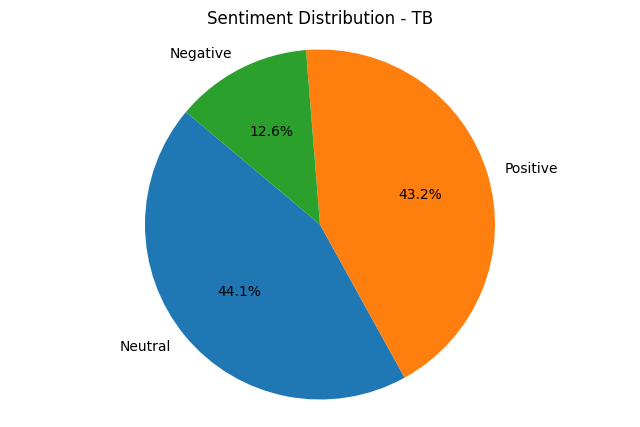

In [37]:
sentiment_counts = AngelsAndDemons_Movie['TBSentiment'].value_counts()
plt.figure(figsize=(8, 5))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution - TB')
plt.axis('equal') 
plt.show()

In [78]:
def categorize_reviews(rating):
    if rating <= 4.5:
        return 'Negative'
    elif rating <= 7.5:
        return 'Neutral'
    else:
        return 'Positive'

AngelsAndDemons_Movie['mReviewCategory'] = AngelsAndDemons_Movie['mRating'].apply(categorize_reviews)

print(AngelsAndDemons_Movie)

                                                  mURL  mRating  \
0    https://www.imdb.com/title/tt0808151/reviews/?...      7.0   
1    https://www.imdb.com/title/tt0808151/reviews/?...      8.0   
2    https://www.imdb.com/title/tt0808151/reviews/?...      5.0   
3    https://www.imdb.com/title/tt0808151/reviews/?...      7.0   
4    https://www.imdb.com/title/tt0808151/reviews/?...      8.0   
..                                                 ...      ...   
190  https://www.imdb.com/title/tt0808151/reviews/?...      7.0   
191  https://www.imdb.com/title/tt0808151/reviews/?...      7.0   
192  https://www.imdb.com/title/tt0808151/reviews/?...      7.0   
193  https://www.imdb.com/title/tt0808151/reviews/?...      8.0   
194  https://www.imdb.com/title/tt0808151/reviews/?...      7.0   

                                               mReview  \
0    Tom Hanks returns as Dan Brown's symbologist R...   
1    This is an OK adaptation of the breath taking ...   
2    I am sorry for a

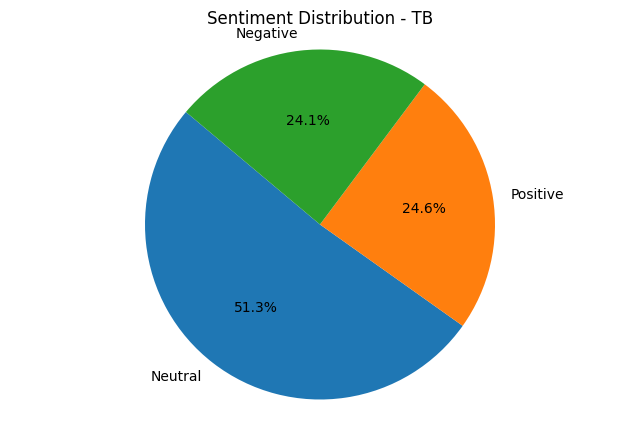

In [79]:
sentiment_counts = AngelsAndDemons_Movie['mReviewCategory'].value_counts()
plt.figure(figsize=(8, 5))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution - TB')
plt.axis('equal') 
plt.show()

C:\Users\Ajay\AppData\Local\Temp\ipykernel_32524\2221194115.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sentiment_scores, shade=True, color='skyblue')


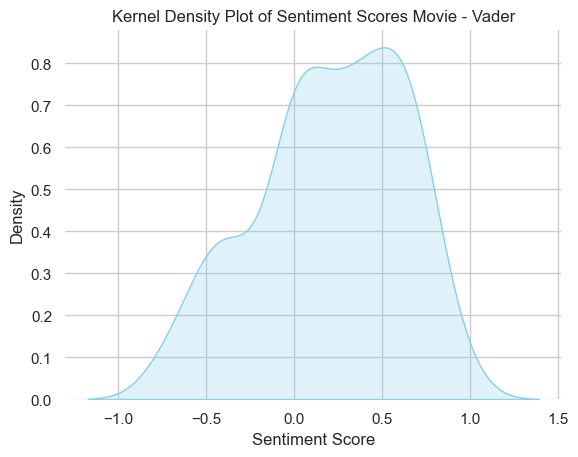

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  # Import matplotlib for plotting
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

sentiment_scores = []

for index, row in AngelsAndDemons_Movie.iterrows():
    review_text = row['PreprocessedReviews']
    sentiment_scores.append(analyzer.polarity_scores(review_text)['compound'])
sns.set(style="whitegrid")
sns.kdeplot(sentiment_scores, shade=True, color='skyblue')
sns.despine(left=True, bottom=True)
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Sentiment Scores Movie - Vader')

plt.show()


C:\Users\Ajay\AppData\Local\Temp\ipykernel_55636\1285107696.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sentiment_scores, shade=True, color='skyblue')


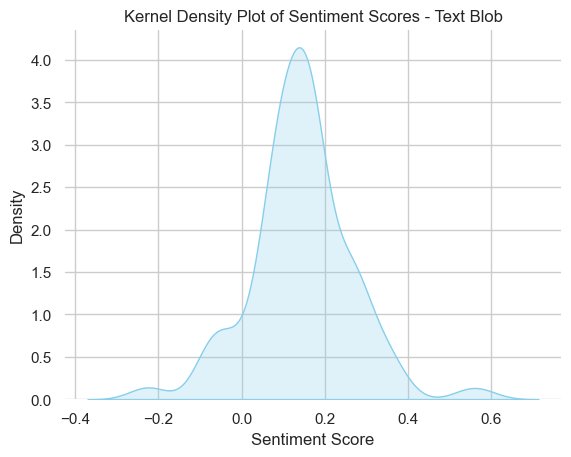

In [190]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob  

sentiment_scores = []
for index, row in AngelsAndDemons_Movie.iterrows():
    review_text = row['PreprocessedReviews']
    sentiment = TextBlob(review_text).sentiment.polarity
    sentiment_scores.append(sentiment)

sns.set(style="whitegrid")
sns.kdeplot(sentiment_scores, shade=True, color='skyblue')
sns.despine(left=True, bottom=True)
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Sentiment Scores - Text Blob')

plt.show()


C:\Users\Ajay\AppData\Local\Temp\ipykernel_32524\1913307205.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(textblob_sentiment_scores, shade=True, color='skyblue', label='Text Blob')
C:\Users\Ajay\AppData\Local\Temp\ipykernel_32524\1913307205.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(vader_sentiment_scores, shade=True, color='orange', label='Vader')


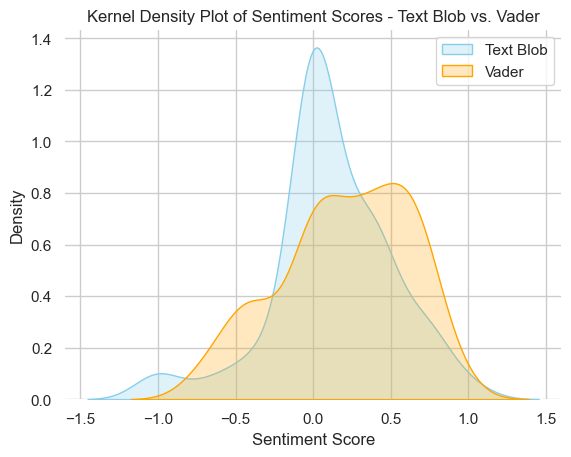

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


textblob_sentiment_scores = []
vader_sentiment_scores = []

analyzer = SentimentIntensityAnalyzer()
for index, row in AngelsAndDemons_Movie.iterrows():
    review_text = row['PreprocessedReviews']
    textblob_sentiment = TextBlob(review_text).sentiment.polarity
    textblob_sentiment_scores.append(textblob_sentiment)
    vader_sentiment = analyzer.polarity_scores(review_text)['compound']
    vader_sentiment_scores.append(vader_sentiment)
sns.set(style="whitegrid")
sns.kdeplot(textblob_sentiment_scores, shade=True, color='skyblue', label='Text Blob')
sns.kdeplot(vader_sentiment_scores, shade=True, color='orange', label='Vader')
sns.despine(left=True, bottom=True)
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Sentiment Scores - Text Blob vs. Vader')
plt.legend()

plt.show()


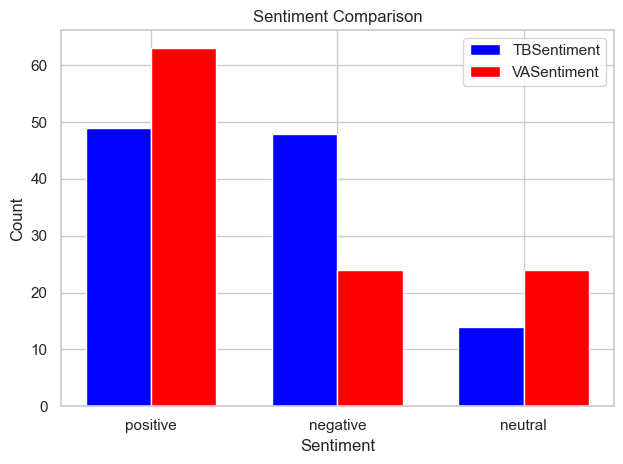

In [42]:
import matplotlib.pyplot as plt
tb_counts = AngelsAndDemons_Movie["TBSentiment"].value_counts()
va_counts = AngelsAndDemons_Movie["VASentiment"].value_counts()
categories = ["positive", "negative","neutral"]
bar_width = 0.35
x = range(len(categories))

plt.bar(x, tb_counts, bar_width, label='TBSentiment', color='blue', align='center')
plt.bar([i + bar_width for i in x], va_counts, bar_width, label='VASentiment', color='red', align='center')

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Comparison')
plt.xticks([i + bar_width/2 for i in x], categories)
plt.legend()

plt.tight_layout()
plt.show()
